In [414]:
import pandas as pd
import matplotlib.pyplot as plt

In [415]:
df = pd.read_csv("final_weather_alarms.csv")
df

,day_datetime,hour_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,...,hour_conditions,region_id,event_all_region,event_intersection_alarm_id,is_alarm,num_of_reg_alarms,num_of_alarms24,light_day_duration,event_duration,seq_num_of_alarm
0,2022-02-24,00:00:00,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,...,Overcast,3,0.0,0.0,0,0,0,10.625000,0.0,0
1,2022-02-24,01:00:00,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,...,Partially cloudy,3,0.0,0.0,0,0,0,10.625000,0.0,0
2,2022-02-24,02:00:00,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,...,Overcast,3,0.0,0.0,0,0,0,10.625000,0.0,0
3,2022-02-24,03:00:00,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,...,Overcast,3,0.0,0.0,0,0,0,10.625000,0.0,0
4,2022-02-24,04:00:00,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,...,Overcast,3,0.0,0.0,0,0,0,10.625000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195080,2023-01-20,19:00:00,11.2,5.7,7.9,6.2,89.3,0.600,12.50,16.8,...,Overcast,2,0.0,0.0,0,0,4,8.844167,0.0,4
195081,2023-01-20,20:00:00,11.2,5.7,7.9,6.2,89.3,0.600,12.50,16.8,...,Partially cloudy,2,0.0,0.0,0,0,4,8.844167,0.0,4
195082,2023-01-20,21:00:00,11.2,5.7,7.9,6.2,89.3,0.600,12.50,16.8,...,Overcast,2,0.0,0.0,0,0,4,8.844167,0.0,4
195083,2023-01-20,22:00:00,11.2,5.7,7.9,6.2,89.3,0.600,12.50,16.8,...,Overcast,2,0.0,0.0,0,6,4,8.844167,0.0,4


In [416]:
preciptype_mapping = {
    1: "Snow",
    0: "No precips",
    2: "Rain",
    3: "Rain, snow",
    4: "Freezing rain",
    5: "Ice"
}

In [417]:
df["hour_preciptype"] = df["hour_preciptype"].replace(preciptype_mapping)

In [418]:
df_alarms = df[df["is_alarm"] == 1]

In [420]:
hour_preciptype_df = df_alarms[["hour_preciptype", "is_alarm"]]

In [421]:
hour_preciptype_list = []

for value in (preciptype_mapping.values()):
    a = hour_preciptype_df[hour_preciptype_df["hour_preciptype"] == value]
    hour_preciptype_list.append(a)

In [422]:
hour_preciptype_list

[       hour_preciptype  is_alarm
 802               Snow         1
 803               Snow         1
 804               Snow         1
 884               Snow         1
 933               Snow         1
 ...                ...       ...
 194453            Snow         1
 194454            Snow         1
 194499            Snow         1
 194501            Snow         1
 195074            Snow         1
 
 [4965 rows x 2 columns],
        hour_preciptype  is_alarm
 64          No precips         1
 65          No precips         1
 90          No precips         1
 91          No precips         1
 92          No precips         1
 ...                ...       ...
 195048      No precips         1
 195049      No precips         1
 195073      No precips         1
 195075      No precips         1
 195076      No precips         1
 
 [42303 rows x 2 columns],
        hour_preciptype  is_alarm
 89                Rain         1
 157               Rain         1
 166               Rain  

In [423]:
sum_alarms_hour_preciptype = []

for i in range(len(hour_preciptype_list)):
    sum_alarms_hour_preciptype.append(hour_preciptype_list[i]["is_alarm"].sum())

sum_alarms_hour_preciptype

[4965, 42303, 1792, 184, 15, 2]

In [424]:
preciptype_mapping.values()

dict_values(['Snow', 'No precips', 'Rain', 'Rain, snow', 'Freezing rain', 'Ice'])

In [425]:
# keys = ['key1', 'key2', 'key3']
values = preciptype_mapping.values()

dict_hour_preciptype_alarms = {}
for key, value in zip(values, sum_alarms_hour_preciptype):
    dict_hour_preciptype_alarms[key] = value

In [426]:
dict_hour_preciptype_alarms

{'Snow': 4965,
 'No precips': 42303,
 'Rain': 1792,
 'Rain, snow': 184,
 'Freezing rain': 15,
 'Ice': 2}

In [427]:
preciptype_df = pd.DataFrame.from_dict(dict_hour_preciptype_alarms, orient="index", columns=["Total number of alarms"])

In [428]:
preciptype_df

,Total number of alarms
Snow,4965
No precips,42303
Rain,1792
"Rain, snow",184
Freezing rain,15
Ice,2


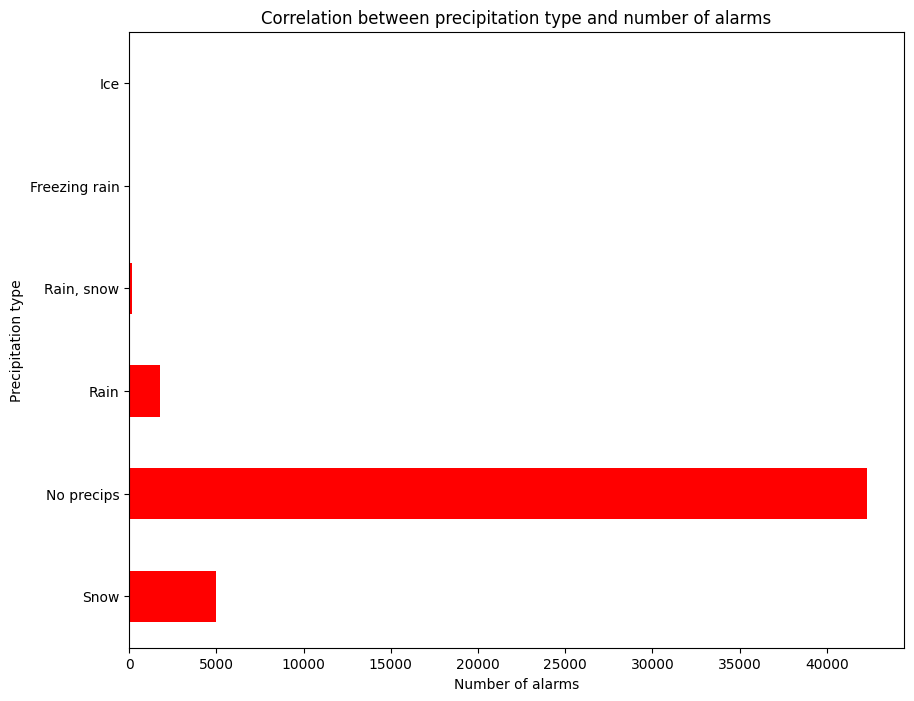

In [429]:
preciptype_df["Total number of alarms"].plot.barh(figsize=(10, 8), color="r")
plt.title("Correlation between precipitation type and number of alarms")
plt.xlabel("Number of alarms")
plt.ylabel("Precipitation type")
plt.show()

In [430]:
conditions_mapping = {
    1: 'Overcast',
    2: 'Partially cloudy',
    3: 'Snow, Overcast',
    4: 'Clear',
    5: 'Rain, Overcast',
    6: 'Rain, Partially cloudy',
    7: 'Snow, Rain, Partially cloudy',
    8: 'Snow, Partially cloudy',
    9: 'Snow, Rain, Overcast',
    10: 'Rain',
    11: 'Freezing Drizzle/Freezing Rain, Overcast',
    12: 'Snow',
    13: 'Snow, Rain',
    14: 'Ice, Overcast'
}

In [431]:
df["hour_conditions"] = df["hour_conditions"].replace(conditions_mapping)

In [432]:
hour_conditions_df = df_alarms[["hour_conditions", "is_alarm"]]

In [433]:
#hour_conditions_df

In [434]:
hour_conditions_list = []

for value in (conditions_mapping.values()):
    a = hour_conditions_df[hour_conditions_df["hour_conditions"] == value]
    hour_conditions_list.append(a)

In [435]:
#hour_conditions_list

In [436]:
sum_alarms_hour_conditions = []

for i in range(len(hour_conditions_list)):
    sum_alarms_hour_conditions.append(hour_conditions_list[i]["is_alarm"].sum())

sum_alarms_hour_conditions

[14742, 19297, 454, 12461, 1455, 568, 30, 57, 154, 34, 7, 2, 0, 0]

In [437]:
values = conditions_mapping.values()

dict_hour_conditions_alarms = {}
for key, value in zip(values, sum_alarms_hour_conditions):
    dict_hour_conditions_alarms[key] = value

In [438]:
dict_hour_conditions_alarms

{'Overcast': 14742,
 'Partially cloudy': 19297,
 'Snow, Overcast': 454,
 'Clear': 12461,
 'Rain, Overcast': 1455,
 'Rain, Partially cloudy': 568,
 'Snow, Rain, Partially cloudy': 30,
 'Snow, Partially cloudy': 57,
 'Snow, Rain, Overcast': 154,
 'Rain': 34,
 'Freezing Drizzle/Freezing Rain, Overcast': 7,
 'Snow': 2,
 'Snow, Rain': 0,
 'Ice, Overcast': 0}

In [439]:
conditions_df = pd.DataFrame.from_dict(dict_hour_conditions_alarms, orient="index", columns=["Total number of alarms"])

In [440]:
conditions_df

,Total number of alarms
Overcast,14742
Partially cloudy,19297
"Snow, Overcast",454
Clear,12461
"Rain, Overcast",1455
"Rain, Partially cloudy",568
"Snow, Rain, Partially cloudy",30
"Snow, Partially cloudy",57
"Snow, Rain, Overcast",154
Rain,34


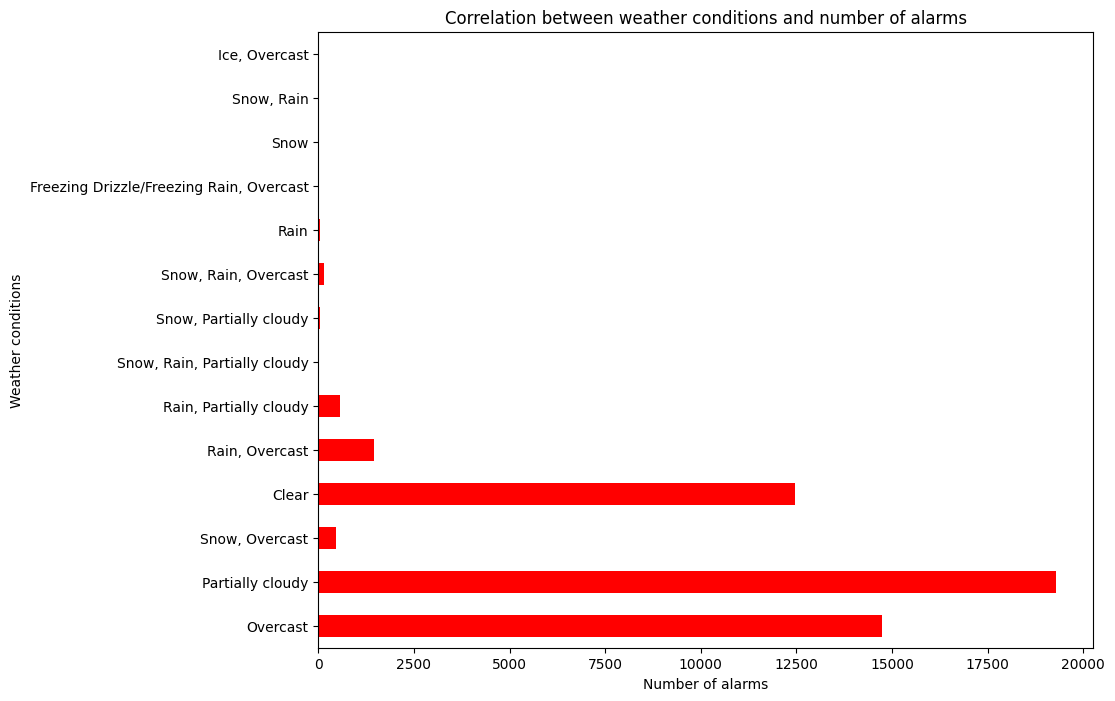

In [441]:
conditions_df["Total number of alarms"].plot.barh(figsize=(10, 8), color="r")
plt.title("Correlation between weather conditions and number of alarms")
plt.xlabel("Number of alarms")
plt.ylabel("Weather conditions")
plt.show()

In [442]:
df_alarms

,day_datetime,hour_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,...,hour_conditions,region_id,event_all_region,event_intersection_alarm_id,is_alarm,num_of_reg_alarms,num_of_alarms24,light_day_duration,event_duration,seq_num_of_alarm
64,2022-02-26,16:00:00,6.3,-1.5,1.9,-2.7,73.4,0.000,0.00,116.2,...,Overcast,3,1.0,0.0,1,4,2,10.751111,0.516667,1
65,2022-02-26,17:00:00,6.3,-1.5,1.9,-2.7,73.4,0.000,0.00,116.2,...,Partially cloudy,3,1.0,0.0,1,5,2,10.751111,0.516667,2
89,2022-02-27,17:00:00,2.5,-1.9,0.0,-3.2,79.3,0.123,4.17,111.4,...,Partially cloudy,3,1.0,0.0,1,7,5,10.814167,0.320833,1
90,2022-02-27,18:00:00,2.5,-1.9,0.0,-3.2,79.3,0.123,4.17,111.4,...,Clear,3,1.0,0.0,1,9,5,10.814167,0.320833,2
91,2022-02-27,19:00:00,2.5,-1.9,0.0,-3.2,79.3,0.123,4.17,111.4,...,Partially cloudy,3,1.0,0.0,1,17,5,10.814167,0.320833,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195049,2023-01-19,12:00:00,10.9,1.2,7.6,5.7,87.8,1.000,4.17,62.0,...,Overcast,2,1.0,0.0,1,28,3,8.803333,1.605556,3
195073,2023-01-20,12:00:00,11.2,5.7,7.9,6.2,89.3,0.600,12.50,16.8,...,Overcast,2,1.0,0.0,1,24,4,8.844167,1.730000,1
195074,2023-01-20,13:00:00,11.2,5.7,7.9,6.2,89.3,0.600,12.50,16.8,...,Overcast,2,1.0,0.0,1,23,4,8.844167,1.730000,2
195075,2023-01-20,14:00:00,11.2,5.7,7.9,6.2,89.3,0.600,12.50,16.8,...,Partially cloudy,2,1.0,0.0,1,23,4,8.844167,1.730000,3


In [443]:
df_without_duplicates = df.drop_duplicates(subset=["day_datetime"])
df_without_duplicates = df_without_duplicates.reset_index(drop=True)

In [444]:
df_without_duplicates

,day_datetime,hour_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,...,hour_conditions,region_id,event_all_region,event_intersection_alarm_id,is_alarm,num_of_reg_alarms,num_of_alarms24,light_day_duration,event_duration,seq_num_of_alarm
0,2022-02-24,00:00:00,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,...,Overcast,3,0.0,0.0,0,0,0,10.625000,0.0,0
1,2022-02-25,00:00:00,6.3,-0.3,2.2,-1.2,78.3,0.200,8.33,45.7,...,Overcast,3,0.0,0.0,0,0,0,10.688056,0.0,0
2,2022-02-26,00:00:00,6.3,-1.5,1.9,-2.7,73.4,0.000,0.00,116.2,...,Clear,3,0.0,0.0,0,1,2,10.751111,0.0,0
3,2022-02-27,00:00:00,2.5,-1.9,0.0,-3.2,79.3,0.123,4.17,111.4,...,Partially cloudy,3,0.0,0.0,0,0,5,10.814167,0.0,0
4,2022-02-28,00:00:00,3.4,-3.7,-0.5,-4.6,74.9,0.100,4.17,97.3,...,Partially cloudy,3,0.0,0.0,0,4,4,10.877778,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,2023-01-16,00:00:00,2.9,0.2,1.2,1.0,91.5,3.633,8.33,13.1,...,Overcast,3,0.0,0.0,0,3,0,8.487222,0.0,0
327,2023-01-17,00:00:00,5.0,0.6,2.8,1.5,89.4,1.053,8.33,38.5,...,Overcast,3,0.0,0.0,0,6,0,8.527500,0.0,0
328,2023-01-18,00:00:00,8.5,1.8,5.5,3.8,88.9,2.817,8.33,20.1,...,Overcast,3,0.0,0.0,0,0,0,8.568611,0.0,0
329,2023-01-19,00:00:00,4.8,1.2,3.4,2.4,93.6,6.397,8.33,6.1,...,Overcast,3,0.0,0.0,0,1,3,8.611111,0.0,0


In [445]:
df_without_duplicates = df_without_duplicates.sort_values(by="event_duration", ascending=False)

In [446]:
df_without_duplicates

,day_datetime,hour_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,...,hour_conditions,region_id,event_all_region,event_intersection_alarm_id,is_alarm,num_of_reg_alarms,num_of_alarms24,light_day_duration,event_duration,seq_num_of_alarm
137,2022-07-11,00:00:00,19.6,10.4,15.2,9.9,71.7,0.817,4.17,213.2,...,Partially cloudy,3,1.0,0.0,1,8,6,16.187778,2.234722,1
54,2022-04-19,00:00:00,7.0,-0.9,2.9,-1.3,76.0,0.408,4.17,193.8,...,Partially cloudy,3,1.0,0.0,1,28,4,14.061944,2.172778,1
98,2022-06-02,00:00:00,24.2,12.3,17.6,13.6,78.5,5.915,4.17,233.0,...,Partially cloudy,3,1.0,0.0,1,21,1,16.218333,1.933056,1
50,2022-04-15,00:00:00,19.1,4.6,10.8,3.2,61.9,0.327,4.17,129.8,...,Partially cloudy,3,1.0,0.0,1,39,7,13.816111,1.905833,1
245,2022-10-27,00:00:00,14.5,5.8,9.3,7.8,91.1,0.000,0.00,89.2,...,Clear,3,1.0,0.0,1,26,5,10.027500,1.656111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2022-06-26,00:00:00,28.2,13.5,22.4,12.7,56.9,0.000,0.00,241.0,...,Clear,3,0.0,0.0,0,2,10,16.479722,0.000000,0
119,2022-06-23,00:00:00,23.0,11.0,17.9,10.4,63.2,0.000,0.00,210.0,...,Partially cloudy,3,0.0,0.0,0,13,9,16.496667,0.000000,0
118,2022-06-22,00:00:00,21.2,11.8,16.1,10.0,69.4,6.738,8.33,268.4,...,Overcast,3,0.0,0.0,0,6,0,16.499444,0.000000,0
117,2022-06-21,00:00:00,22.9,11.8,17.4,11.6,70.3,7.141,8.33,282.0,...,Partially cloudy,3,0.0,0.0,0,3,0,16.500000,0.000000,0


In [447]:
new_df = df_without_duplicates.head(20)

In [448]:
new_df

,day_datetime,hour_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,...,hour_conditions,region_id,event_all_region,event_intersection_alarm_id,is_alarm,num_of_reg_alarms,num_of_alarms24,light_day_duration,event_duration,seq_num_of_alarm
137,2022-07-11,00:00:00,19.6,10.4,15.2,9.9,71.7,0.817,4.17,213.2,...,Partially cloudy,3,1.0,0.0,1,8,6,16.187778,2.234722,1
54,2022-04-19,00:00:00,7.0,-0.9,2.9,-1.3,76.0,0.408,4.17,193.8,...,Partially cloudy,3,1.0,0.0,1,28,4,14.061944,2.172778,1
98,2022-06-02,00:00:00,24.2,12.3,17.6,13.6,78.5,5.915,4.17,233.0,...,Partially cloudy,3,1.0,0.0,1,21,1,16.218333,1.933056,1
50,2022-04-15,00:00:00,19.1,4.6,10.8,3.2,61.9,0.327,4.17,129.8,...,Partially cloudy,3,1.0,0.0,1,39,7,13.816111,1.905833,1
245,2022-10-27,00:00:00,14.5,5.8,9.3,7.8,91.1,0.000,0.00,89.2,...,Clear,3,1.0,0.0,1,26,5,10.027500,1.656111,1
32,2022-03-28,00:00:00,17.4,-0.2,7.9,-4.7,42.6,0.000,0.00,211.0,...,Clear,3,1.0,0.0,1,42,10,12.676944,1.321667,1
113,2022-06-17,00:00:00,21.1,12.7,16.7,12.0,74.3,3.656,8.33,156.3,...,Partially cloudy,3,1.0,0.0,1,26,2,16.487500,1.233611,1
100,2022-06-04,00:00:00,23.8,12.6,17.6,11.6,69.8,1.634,4.17,193.8,...,Clear,3,1.0,0.0,1,35,3,16.273056,1.103889,1
59,2022-04-24,00:00:00,16.5,3.5,9.6,4.9,74.5,1.000,12.50,168.3,...,Partially cloudy,3,1.0,0.0,1,30,5,14.363611,1.081667,1
34,2022-03-30,00:00:00,11.0,5.0,7.6,1.3,66.0,0.100,4.17,155.1,...,Overcast,3,1.0,0.0,1,26,8,12.805278,1.011389,1


In [449]:
new_df = new_df.set_index("day_datetime")
new_df

,hour_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,...,hour_conditions,region_id,event_all_region,event_intersection_alarm_id,is_alarm,num_of_reg_alarms,num_of_alarms24,light_day_duration,event_duration,seq_num_of_alarm
day_datetime,,,,,,,,,,,,,,,,,,,,,
2022-07-11,00:00:00,19.6,10.4,15.2,9.9,71.7,0.817,4.17,213.2,18.3,...,Partially cloudy,3,1.0,0.0,1,8,6,16.187778,2.234722,1
2022-04-19,00:00:00,7.0,-0.9,2.9,-1.3,76.0,0.408,4.17,193.8,16.7,...,Partially cloudy,3,1.0,0.0,1,28,4,14.061944,2.172778,1
2022-06-02,00:00:00,24.2,12.3,17.6,13.6,78.5,5.915,4.17,233.0,20.3,...,Partially cloudy,3,1.0,0.0,1,21,1,16.218333,1.933056,1
2022-04-15,00:00:00,19.1,4.6,10.8,3.2,61.9,0.327,4.17,129.8,11.3,...,Partially cloudy,3,1.0,0.0,1,39,7,13.816111,1.905833,1
2022-10-27,00:00:00,14.5,5.8,9.3,7.8,91.1,0.000,0.00,89.2,7.5,...,Clear,3,1.0,0.0,1,26,5,10.027500,1.656111,1
2022-03-28,00:00:00,17.4,-0.2,7.9,-4.7,42.6,0.000,0.00,211.0,18.4,...,Clear,3,1.0,0.0,1,42,10,12.676944,1.321667,1
2022-06-17,00:00:00,21.1,12.7,16.7,12.0,74.3,3.656,8.33,156.3,13.5,...,Partially cloudy,3,1.0,0.0,1,26,2,16.487500,1.233611,1
2022-06-04,00:00:00,23.8,12.6,17.6,11.6,69.8,1.634,4.17,193.8,16.7,...,Clear,3,1.0,0.0,1,35,3,16.273056,1.103889,1
2022-04-24,00:00:00,16.5,3.5,9.6,4.9,74.5,1.000,12.50,168.3,14.6,...,Partially cloudy,3,1.0,0.0,1,30,5,14.363611,1.081667,1


In [450]:
new_df = new_df[["event_duration"]]

In [451]:
new_df

,event_duration
day_datetime,
2022-07-11,2.234722
2022-04-19,2.172778
2022-06-02,1.933056
2022-04-15,1.905833
2022-10-27,1.656111
2022-03-28,1.321667
2022-06-17,1.233611
2022-06-04,1.103889
2022-04-24,1.081667


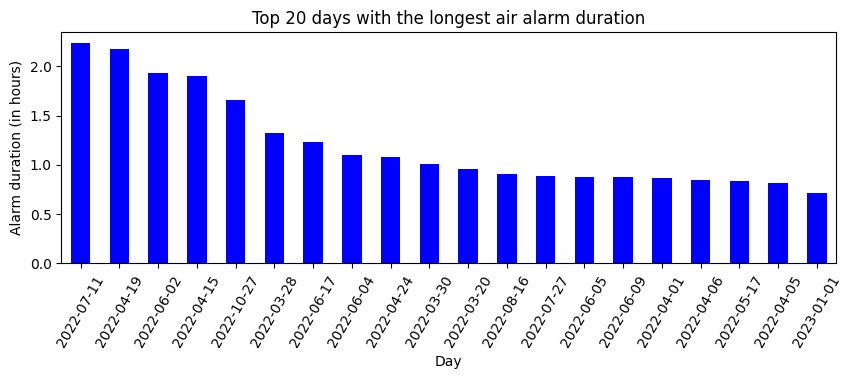

In [452]:
new_df["event_duration"].plot.bar(figsize=(10, 3), color="b")
plt.title("Top 20 days with the longest air alarm duration")
plt.xlabel("Day")
plt.ylabel("Alarm duration (in hours)")
plt.xticks(rotation=60)
plt.show()

In [454]:
df_without_duplicates_10 = df_without_duplicates.head(20)
df_without_duplicates_10

,day_datetime,hour_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,...,hour_conditions,region_id,event_all_region,event_intersection_alarm_id,is_alarm,num_of_reg_alarms,num_of_alarms24,light_day_duration,event_duration,seq_num_of_alarm
137,2022-07-11,00:00:00,19.6,10.4,15.2,9.9,71.7,0.817,4.17,213.2,...,Partially cloudy,3,1.0,0.0,1,8,6,16.187778,2.234722,1
54,2022-04-19,00:00:00,7.0,-0.9,2.9,-1.3,76.0,0.408,4.17,193.8,...,Partially cloudy,3,1.0,0.0,1,28,4,14.061944,2.172778,1
98,2022-06-02,00:00:00,24.2,12.3,17.6,13.6,78.5,5.915,4.17,233.0,...,Partially cloudy,3,1.0,0.0,1,21,1,16.218333,1.933056,1
50,2022-04-15,00:00:00,19.1,4.6,10.8,3.2,61.9,0.327,4.17,129.8,...,Partially cloudy,3,1.0,0.0,1,39,7,13.816111,1.905833,1
245,2022-10-27,00:00:00,14.5,5.8,9.3,7.8,91.1,0.000,0.00,89.2,...,Clear,3,1.0,0.0,1,26,5,10.027500,1.656111,1
32,2022-03-28,00:00:00,17.4,-0.2,7.9,-4.7,42.6,0.000,0.00,211.0,...,Clear,3,1.0,0.0,1,42,10,12.676944,1.321667,1
113,2022-06-17,00:00:00,21.1,12.7,16.7,12.0,74.3,3.656,8.33,156.3,...,Partially cloudy,3,1.0,0.0,1,26,2,16.487500,1.233611,1
100,2022-06-04,00:00:00,23.8,12.6,17.6,11.6,69.8,1.634,4.17,193.8,...,Clear,3,1.0,0.0,1,35,3,16.273056,1.103889,1
59,2022-04-24,00:00:00,16.5,3.5,9.6,4.9,74.5,1.000,12.50,168.3,...,Partially cloudy,3,1.0,0.0,1,30,5,14.363611,1.081667,1
34,2022-03-30,00:00:00,11.0,5.0,7.6,1.3,66.0,0.100,4.17,155.1,...,Overcast,3,1.0,0.0,1,26,8,12.805278,1.011389,1


In [456]:
df_duration = df_without_duplicates[["light_day_duration", "event_duration"]]
df_duration

,light_day_duration,event_duration
137,16.187778,2.234722
54,14.061944,2.172778
98,16.218333,1.933056
50,13.816111,1.905833
245,10.027500,1.656111
...,...,...
122,16.479722,0.000000
119,16.496667,0.000000
118,16.499444,0.000000
117,16.500000,0.000000


In [457]:
df_duration2 = df_duration.set_index("event_duration")
df_duration2

,light_day_duration
event_duration,
2.234722,16.187778
2.172778,14.061944
1.933056,16.218333
1.905833,13.816111
1.656111,10.027500
...,...
0.000000,16.479722
0.000000,16.496667
0.000000,16.499444


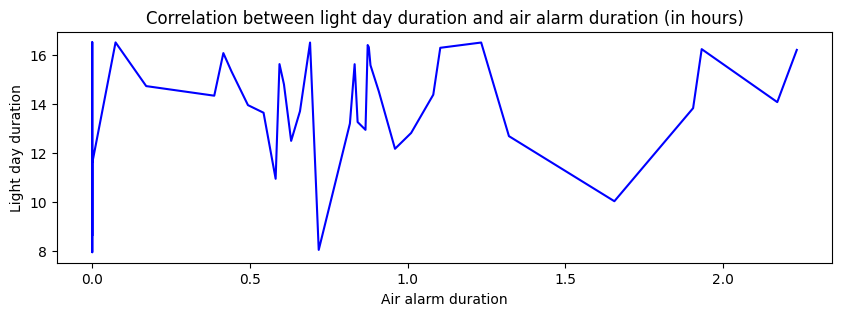

In [458]:
df_duration2["light_day_duration"].plot(figsize=(10, 3), color="b")
plt.title("Correlation between light day duration and air alarm duration (in hours)")
plt.xlabel("Air alarm duration")
plt.ylabel("Light day duration")
plt.show()